**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Datasets

In [ ]:
file_path = "/content/drive/MyDrive/12 Orthopedic patients - Biomechanical Analysis/column_3C_weka.csv"
df = pd.read_csv(file_path) #read the csv file
df.head() #Visualize the headers of the dataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Dataset checking

In [ ]:
# Shape of dataset
print("Dataset shape:", df.shape)
# Column names
print("Columns:", df.columns)
# Check missing values
print(df.isnull().sum())
# Check class distribution
print(df['class'].value_counts())


Dataset shape: (310, 7)
Columns: Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')
pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
class
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64


Data Visualization

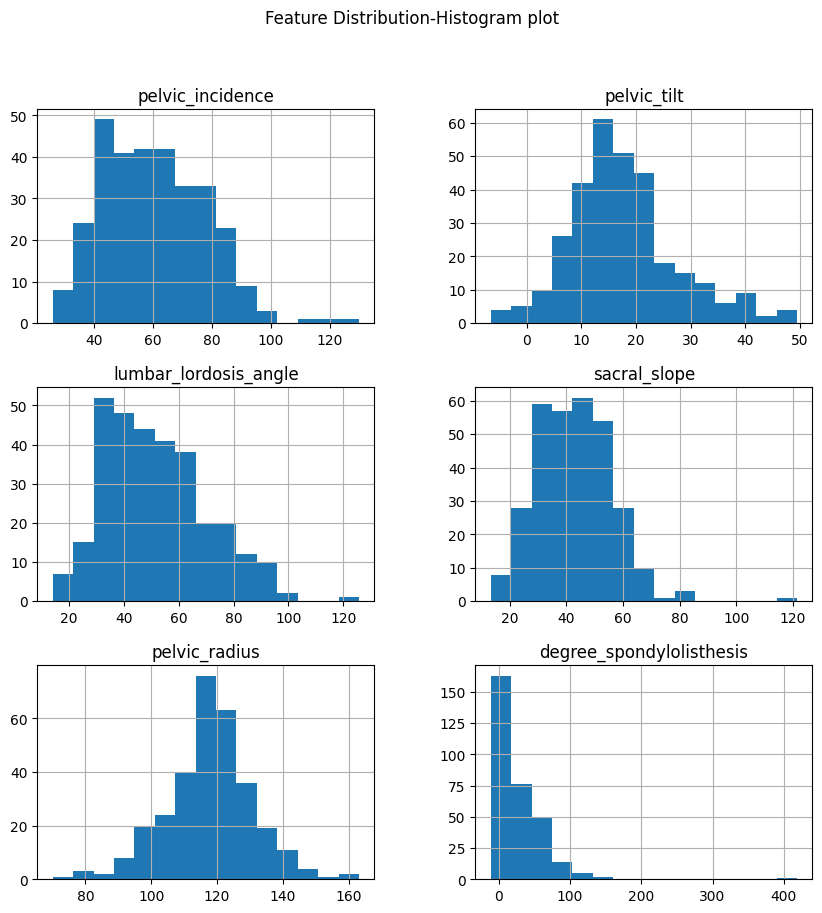

In [ ]:
#Histogram of Features

features = df.columns[:-1] #all columns except last one (target)

#ploting histogram
df[features].hist(bins=15, figsize=(10,10))
plt.suptitle("Feature Distribution-Histogram plot")
plt.show()

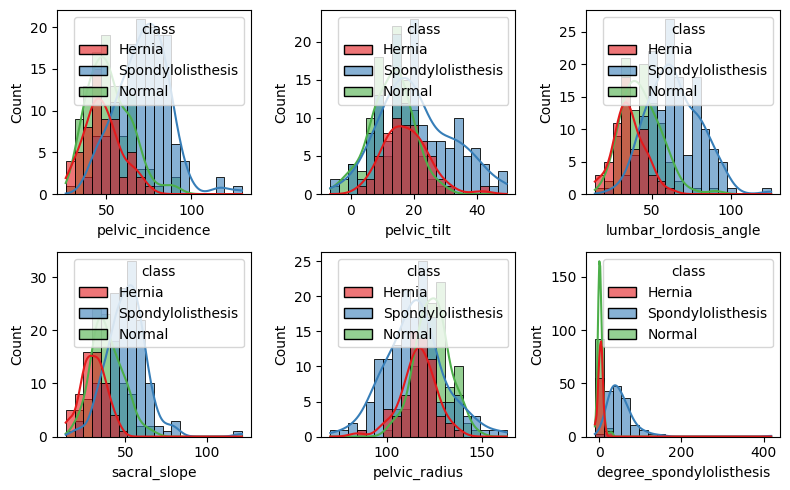

In [ ]:
plt.figure(figsize=(8,5))
for i, feature in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(data=df, x=feature, hue='class',bins=20,kde=True,palette='Set1',alpha=0.6)
  #plt.title(f'{feature} Distbution by Class')
plt.tight_layout()
plt.show()

Boxplot Visualization

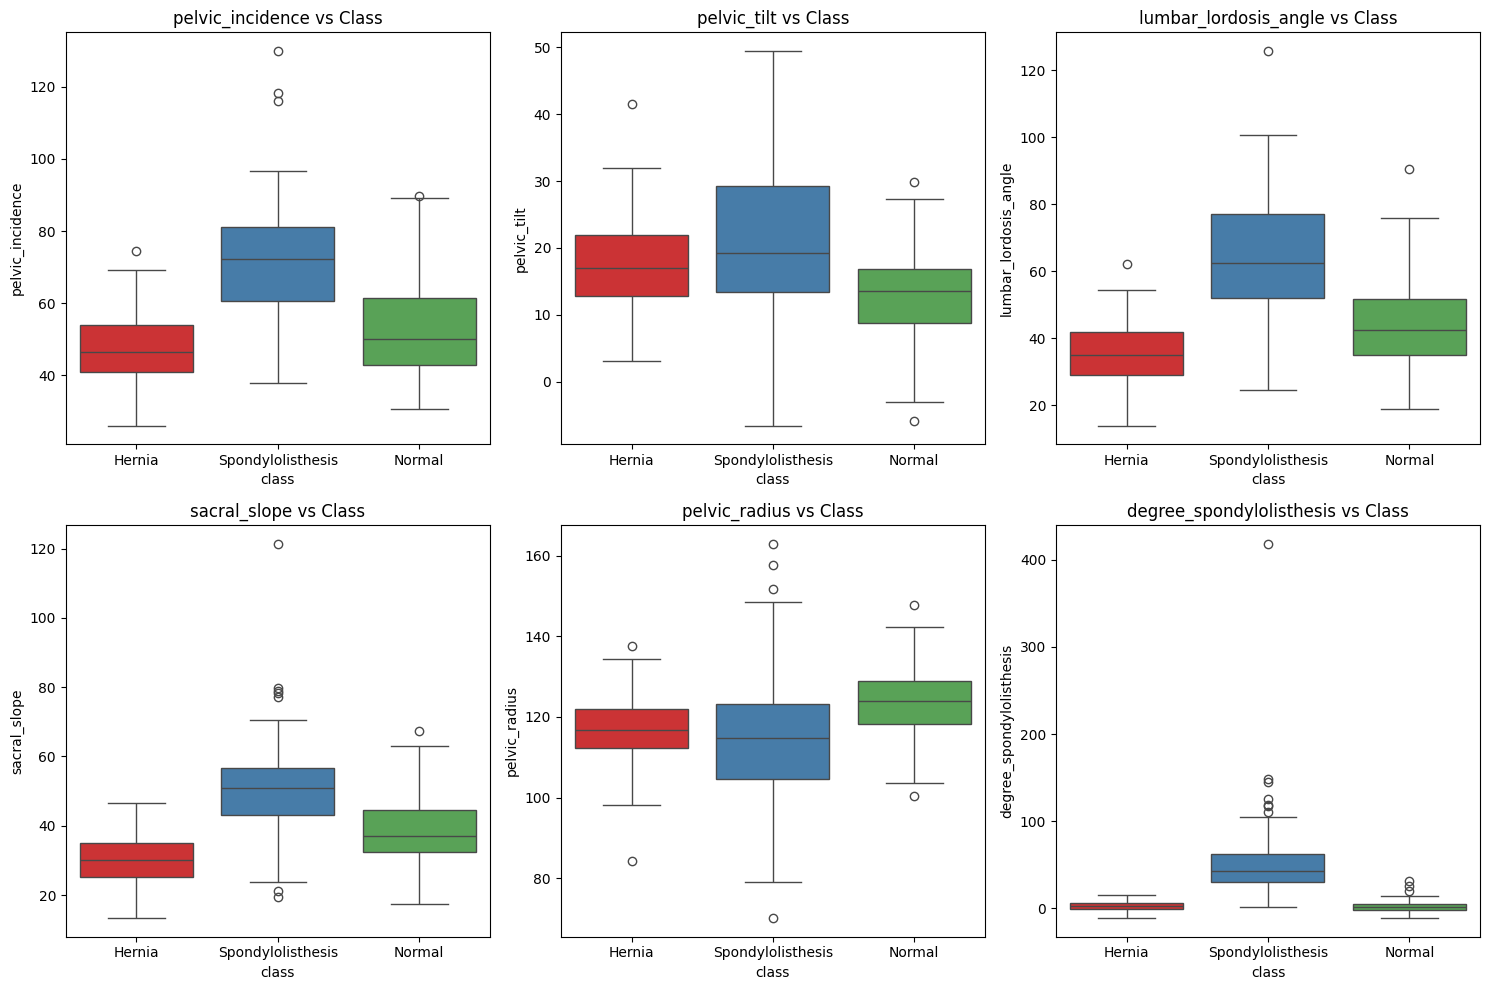

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(x='class', y=col, data=df, hue='class',palette='Set1')
  plt.title(f'{col} vs Class')
plt.tight_layout()
plt.show()

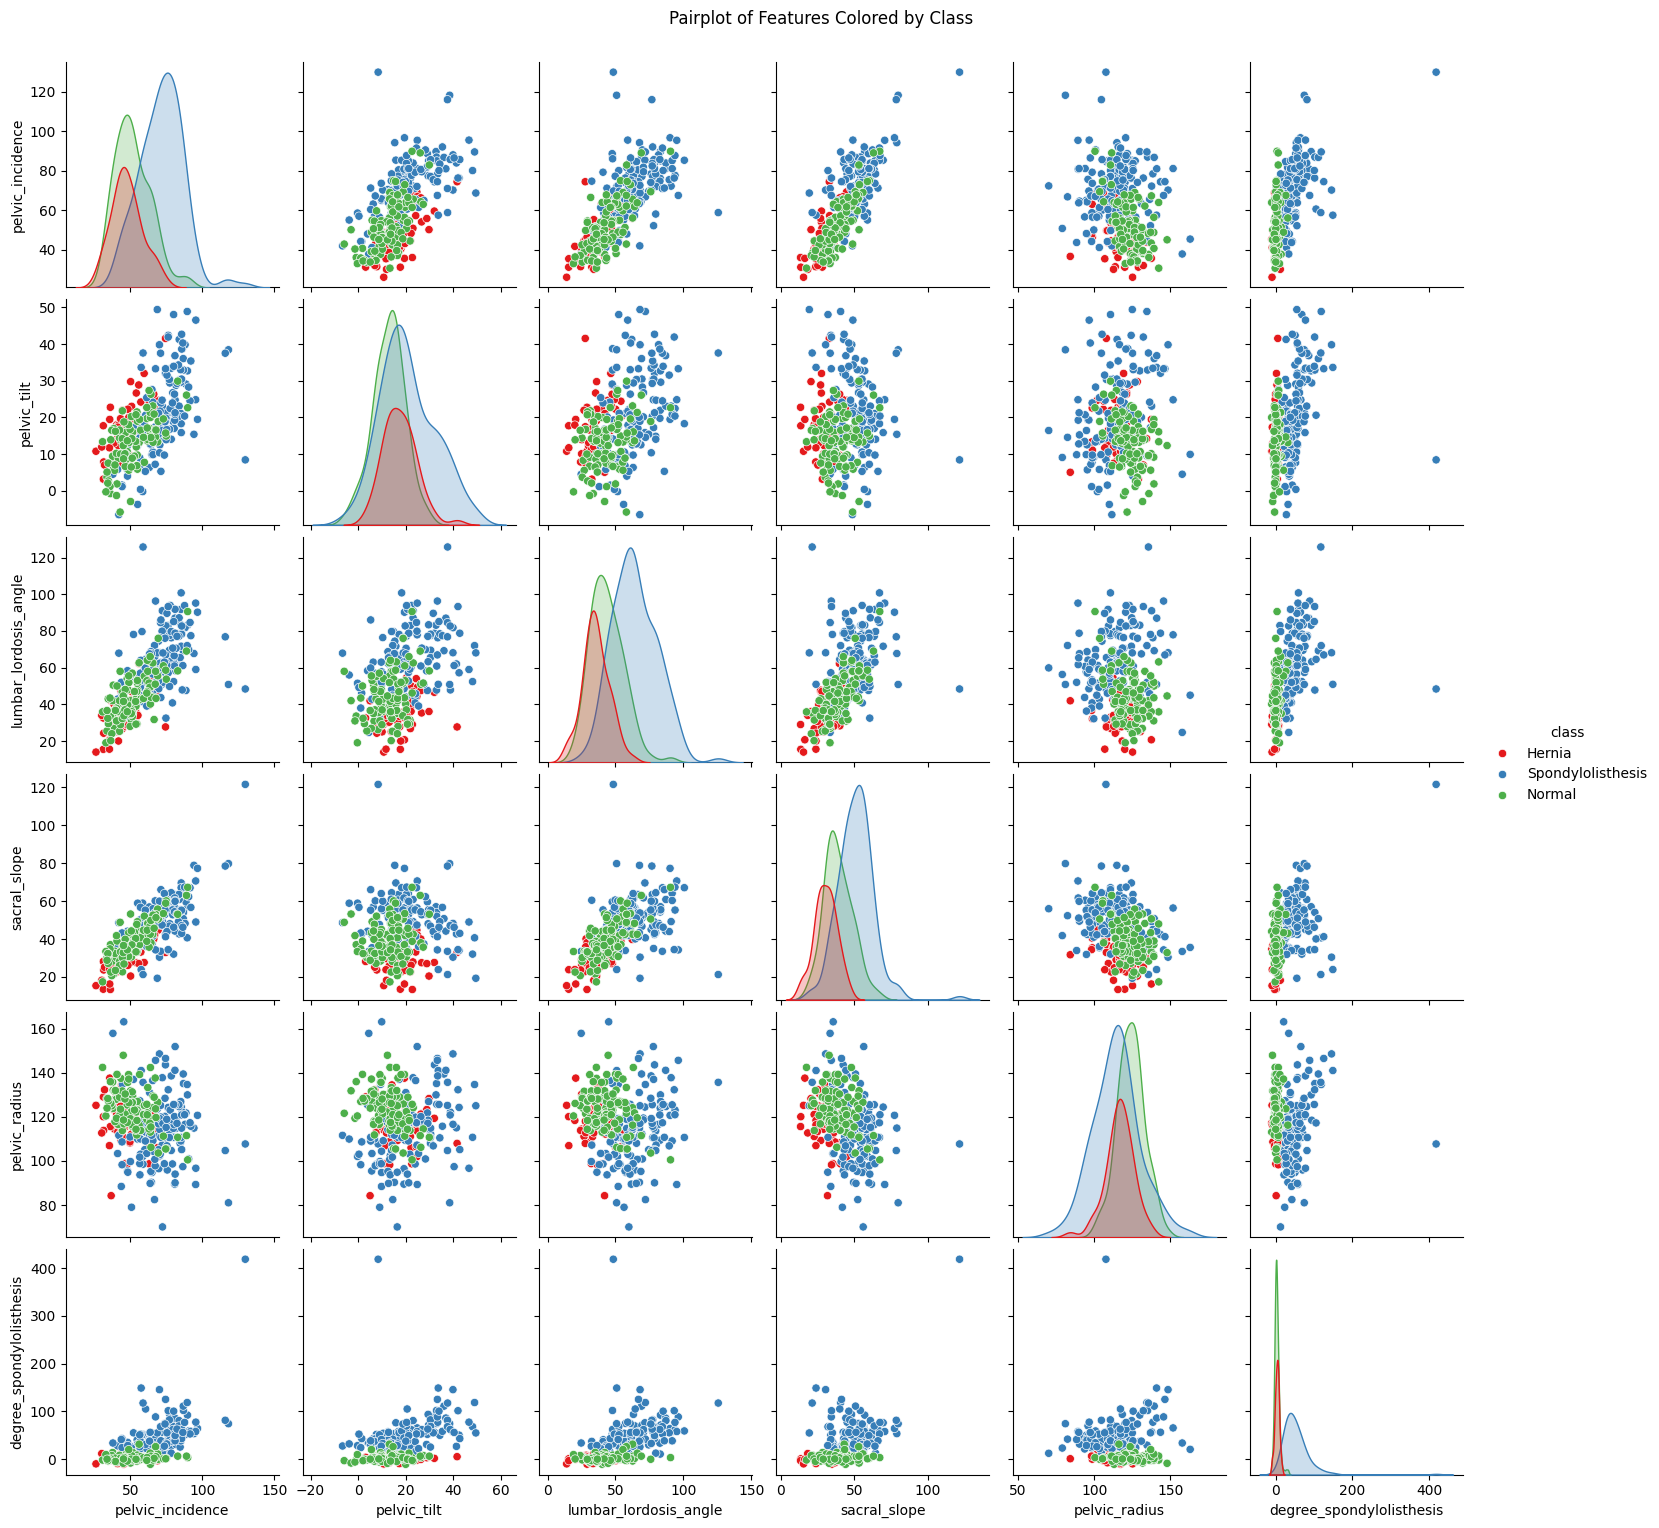

In [ ]:
#pairplot (feature correlations & class seperation)

sns.pairplot(df, hue='class', diag_kind='kde',palette='Set1')
plt.suptitle("Pairplot of Features Colored by Class", y=1.02)
plt.show()

Statistics of the feature

In [ ]:
df.groupby('class')[features].describe()

pelvic_incidence                                   \
                             count       mean        std        min   
class                                                                 
Hernia                        60.0  47.638407  10.697131  26.147921   
Normal                       100.0  51.685244  12.368161  30.741938   
Spondylolisthesis            150.0  71.514224  15.109337  37.903910   

                                                               pelvic_tilt  \
                         25%        50%        75%         max       count   
class                                                                        
Hernia             41.018099  46.416169  53.922329   74.433593        60.0   
Normal             42.817849  50.123115  61.470097   89.834676       100.0   
Spondylolisthesis  60.658136  72.149306  81.075893  129.834041       150.0   

                              ... pelvic_radius              \
                        mean  ...           75%         max   
class                         ...                             
Hernia             17.398795  ...    122.042999  137.540613   
Normal             12.821414  ...    129.040401  147.894637   
Spondylolisthesis  20.748038  ...    123.337307  163.071041   

                  degree_spondylolisthesis                                   \
                                     count       mean        std        min   
class                                                                         
Hernia                                60.0   2.480251   5.531177 -10.675871   
Normal                               100.0   2.186572   6.307483 -11.058179   
Spondylolisthesis                    150.0  51.896687  40.108030   1.010041   

                                                                
                         25%        50%        75%         max  
class                                                           
Hernia             -0.910819   2.542441   6.059666   15.779697  
Normal             -1.511360   1.152710   4.968807   31.172767  
Spondylolisthesis  30.393271  42.372509  61.894425  418.543082  

[3 rows x 48 columns]

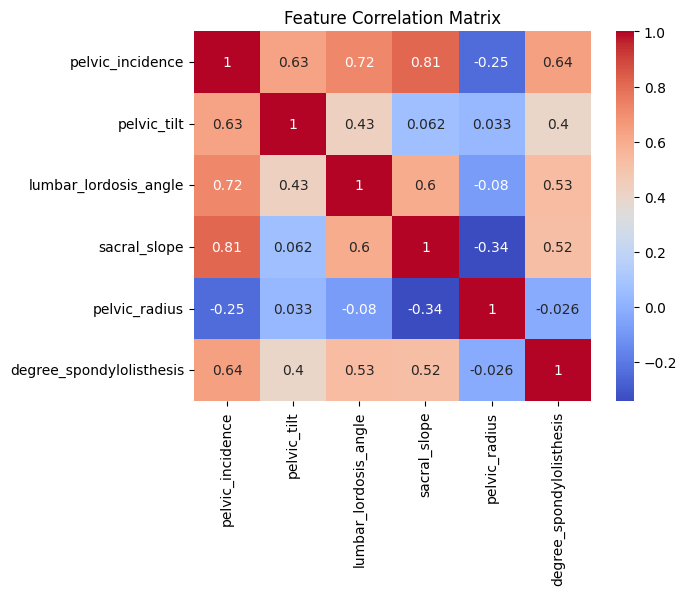

In [ ]:
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


f-oneway ANOVA

In [ ]:
from scipy.stats import ttest_ind, f_oneway
hernia = df[df['class']=='Hernia'][feature]
normal = df[df['class']=='Normal'][feature]
Spondylolisthesis = df[df['class']=='Spondylolisthesis'][feature]

for feature in features:
  f_statistic, p_value = f_oneway(df[df['class']=='Hernia'][feature],
                                  df[df['class']=='Normal'][feature],
                                  df[df['class']=='Spondylolisthesis'][feature])
  print(f"{feature}: p-value ={p_value:.3f}")

pelvic_incidence: p-value =0.000
pelvic_tilt: p-value =0.000
lumbar_lordosis_angle: p-value =0.000
sacral_slope: p-value =0.000
pelvic_radius: p-value =0.000
degree_spondylolisthesis: p-value =0.000


Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
c=df.drop(columns=['class'])
vif_data = pd.DataFrame()
vif_data['Feature']=c.columns
vif_data['VIF']=[variance_inflation_factor(c.values,i) for i in range(c.shape[1])]
print(vif_data)

                    Feature        VIF
0          pelvic_incidence        inf
1               pelvic_tilt        inf
2     lumbar_lordosis_angle  18.942994
3              sacral_slope        inf
4             pelvic_radius  12.282573
5  degree_spondylolisthesis   2.361769


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only feature columns (exclude target)
X = df.drop(columns=['class'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                    Feature        VIF
0          pelvic_incidence        inf
1               pelvic_tilt        inf
2     lumbar_lordosis_angle  18.942994
3              sacral_slope        inf
4             pelvic_radius  12.282573
5  degree_spondylolisthesis   2.361769


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing one of the reductant feature

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only feature columns (exclude target)
X = df.drop(columns=['class','pelvic_incidence','lumbar_lordosis_angle'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                    Feature        VIF
0               pelvic_tilt   4.791892
1              sacral_slope  10.982582
2             pelvic_radius  11.807684
3  degree_spondylolisthesis   2.308863


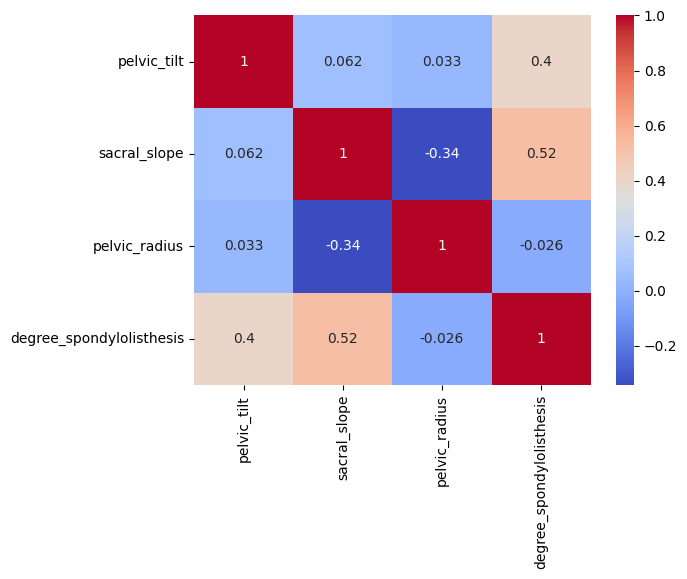

                          pelvic_tilt  sacral_slope  pelvic_radius  \
pelvic_tilt                  1.000000      0.062345       0.032668   
sacral_slope                 0.062345      1.000000      -0.342128   
pelvic_radius                0.032668     -0.342128       1.000000   
degree_spondylolisthesis     0.397862      0.523557      -0.026065   

                          degree_spondylolisthesis  
pelvic_tilt                               0.397862  
sacral_slope                              0.523557  
pelvic_radius                            -0.026065  
degree_spondylolisthesis                  1.000000  


In [ ]:


sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

corr_matrix=X.corr()
print(corr_matrix)


**AUTOMATED VIF BASED FEATURE SELECTION**




In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select feature columns (exclude target)
X = df.drop(columns=['class']).copy()

# Iteratively drop features with high VIF
threshold = 15
while True:
    # Calculate VIF for all features
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Find the feature with the highest VIF
    max_vif = vif_data['VIF'].max()
    if max_vif <= threshold:
        break  # Stop if all VIFs are below threshold

    # Drop the feature with the highest VIF
    drop_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
    print(f"Dropping '{drop_feature}' with VIF={max_vif:.2f}")
    X = X.drop(columns=[drop_feature])

# Final feature set and their VIFs
final_vif = pd.DataFrame()
final_vif['Feature'] = X.columns
final_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nFinal feature set with acceptable VIFs:")
print(final_vif)


Dropping 'pelvic_incidence' with VIF=inf
Dropping 'lumbar_lordosis_angle' with VIF=18.89

Final feature set with acceptable VIFs:
                    Feature        VIF
0               pelvic_tilt   4.791892
1              sacral_slope  10.982582
2             pelvic_radius  11.807684
3  degree_spondylolisthesis   2.308863


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Logistic regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target
X = df[['pelvic_tilt','sacral_slope', 'degree_spondylolisthesis']] # Using features with acceptable VIF
y = df['class']

# Convert y to numerical values
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_test_prob = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)

# Evaluate test set performance
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.8387096774193549
Confusion Matrix:
 [[ 8  3  1]
 [ 5 15  0]
 [ 0  1 29]]
ROC-AUC: 0.9562701612903226
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.79      0.75      0.77        20
           2       0.97      0.97      0.97        30

    accuracy                           0.84        62
   macro avg       0.79      0.79      0.79        62
weighted avg       0.84      0.84      0.84        62



In [ ]:
import pickle

# Define the filename to save the model
filename = 'logistic_model_Orthopedic.pkl'

# Save the trained model to the file using pickle
with open(filename, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to {filename}")

Model saved to logistic_model_Orthopedic.pkl


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize  # Import minimize for optimization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE # Import SMOTE

# Define features and target
X = df[['pelvic_tilt', 'sacral_slope', 'degree_spondylolisthesis', 'pelvic_radius','pelvic_incidence','lumbar_lordosis_angle']] # Include all relevant features
y = df['class']

# Encode target
le = LabelEncoder()
y_numeric = le.fit_transform(y)
num_classes = len(le.classes_) # Get the number of classes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

# Apply SMOTE to balance classes in the training set
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Add bias (intercept) term to X for the resampled data
X_train_bias = np.c_[np.ones(X_train_resampled.shape[0]), X_train_resampled.values]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test.values]


# Define softmax function for multi-class
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define negative log-likelihood function for multi-class
def neg_log_likelihood(theta, X, y, num_classes):
    # Reshape theta for matrix multiplication
    theta = theta.reshape(-1, num_classes)
    logits = X @ theta
    p = softmax(logits)

    # Create one-hot encoded target vector
    y_onehot = np.eye(num_classes)[y]

    # Calculate cross-entropy loss
    epsilon = 1e-15 # Added epsilon for numerical stability
    loss = -np.sum(y_onehot * np.log(p + epsilon))
    return loss

# Initialize parameters (theta) for multi-class
theta_init = np.zeros((X_train_bias.shape[1], num_classes)).flatten() # Initialize theta with shape (features + 1, num_classes)

# Optimize parameters using 'BFGS'
result = minimize(neg_log_likelihood, theta_init, args=(X_train_bias, y_train_resampled, num_classes), method='BFGS', options={'disp': True, 'maxiter': 1000})

# Extract final parameters (θ)
theta_opt = result.x.reshape(-1, num_classes)
print("Optimized Parameters (θ):\n", theta_opt)
print("Number of Parameters:", theta_opt.size)

# Predictions on test set
y_prob = softmax(X_test_bias @ theta_opt)
y_pred = np.argmax(y_prob, axis=1)

# Evaluate
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC for multi-class
try:
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    print("ROC-AUC (OVR):", roc_auc)
except ValueError as e:
    print(f"Could not calculate ROC-AUC: {e}")

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_)) # Use target_names in report

         Current function value: 114.079255
         Iterations: 42
         Function evaluations: 1837
         Gradient evaluations: 83
Optimized Parameters (θ):
 [[ 1.68226043e+01 -1.10830450e+01 -5.73950502e+00]
 [ 6.46498698e-02 -8.11635422e-02 -5.74807041e-03]
 [-1.45911671e-01  4.72519897e-02 -1.89208486e-02]
 [-9.25209684e-02 -1.08044769e-01  1.99884684e-01]
 [-4.69075312e-01 -2.88054766e-01 -3.86275384e-01]
 [-1.19942220e-01 -7.41354074e-02 -4.00565340e-02]
 [-4.91902443e-02 -6.30477343e-02 -3.80360063e-02]]
Number of Parameters: 21

Test Accuracy: 0.8225806451612904
Confusion Matrix:
 [[ 9  3  0]
 [ 5 14  1]
 [ 1  1 28]]
ROC-AUC (OVR): 0.9498809523809525
Classification Report:
                    precision    recall  f1-score   support

           Hernia       0.60      0.75      0.67        12
           Normal       0.78      0.70      0.74        20
Spondylolisthesis       0.97      0.93      0.95        30

         accuracy                           0.82        62
      

/usr/local/lib/python3.12/dist-packages/scipy/optimize/_minimize.py:779: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


Logistic Regression with feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE # Import SMOTE

# Define features and target
X = df[['pelvic_tilt', 'sacral_slope', 'degree_spondylolisthesis','pelvic_radius']] # Include all relevant features
y = df['class']

# Encode target
le = LabelEncoder()
y_numeric = le.fit_transform(y)
num_classes = len(le.classes_)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

# Apply SMOTE to balance classes in the training set
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Adding bias (intercept) term to X for the resampled data
X_train_bias = np.c_[np.ones(X_train_resampled.shape[0]), X_train_resampled.values]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test.values]


# Define softmax function for multi-class
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define negative log-likelihood function for multi-class
def neg_log_likelihood(theta, X, y, num_classes):
    # Reshape theta for matrix multiplication
    theta = theta.reshape(-1, num_classes)
    logits = X @ theta
    p = softmax(logits)

    # Create one-hot encoded target vector
    y_onehot = np.eye(num_classes)[y]

    # Calculate cross-entropy loss
    epsilon = 1e-15 # Added epsilon for numerical stability
    loss = -np.sum(y_onehot * np.log(p + epsilon))
    return loss

# Initialize parameters (theta) for multi-class
theta_init = np.zeros((X_train_bias.shape[1], num_classes)).flatten() # Initialize theta with shape (features + 1, num_classes)

# Optimize parameters using 'BFGS'
result = minimize(neg_log_likelihood, theta_init, args=(X_train_bias, y_train_resampled, num_classes), method='BFGS', options={'disp': True, 'maxiter': 1000})

# Extract final parameters (θ)
theta_opt = result.x.reshape(-1, num_classes)
print("Optimized Parameters (θ):\n", theta_opt)
print("Number of Parameters:", theta_opt.size)

# Predictions on test set
y_prob = softmax(X_test_bias @ theta_opt)
y_pred = np.argmax(y_prob, axis=1)

# Evaluate
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC for multi-class
try:
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    print("ROC-AUC (OVR):", roc_auc)
except ValueError as e:
    print(f"Could not calculate ROC-AUC: {e}")

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_)) # Use target_names in report

         Current function value: 113.719377
         Iterations: 33
         Function evaluations: 1372
         Gradient evaluations: 85
Optimized Parameters (θ):
 [[ 16.6679182  -10.18798709  -6.48002292]
 [  0.02372817  -0.07604972   0.03782849]
 [ -0.17653658   0.04801941   0.05443974]
 [ -0.09526288  -0.10275772   0.19646362]
 [ -0.33278372  -0.16026256  -0.24840301]]
Number of Parameters: 15

Test Accuracy: 0.8548387096774194
Confusion Matrix:
 [[ 9  3  0]
 [ 4 16  0]
 [ 1  1 28]]
ROC-AUC (OVR): 0.9534325396825397
Classification Report:
                    precision    recall  f1-score   support

           Hernia       0.64      0.75      0.69        12
           Normal       0.80      0.80      0.80        20
Spondylolisthesis       1.00      0.93      0.97        30

         accuracy                           0.85        62
        macro avg       0.81      0.83      0.82        62
     weighted avg       0.87      0.85      0.86        62



/usr/local/lib/python3.12/dist-packages/scipy/optimize/_minimize.py:779: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


Mounted at /content/drive
Libraries imported, df re-loaded after remounting drive, target encoded, and plot_confusion_matrix function defined.


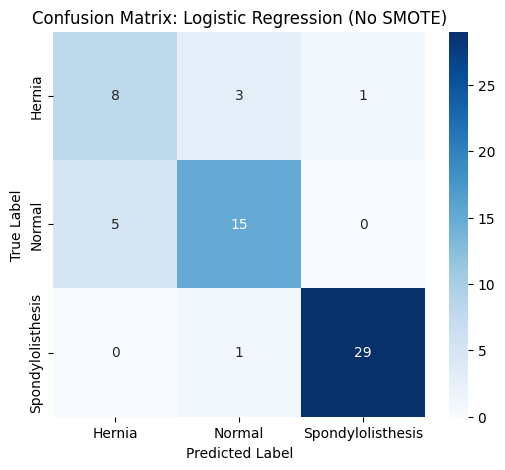

Confusion matrix for Logistic Regression (No SMOTE) displayed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from scipy.optimize import minimize # For Custom Softmax

# --- Re-mount Google Drive and re-load df --- (Included for robustness, assume user fixes mount issue)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = "/content/drive/MyDrive/12 Orthopedic patients - Biomechanical Analysis/column_3C_weka.csv"
df = pd.read_csv(file_path)

# --- Global setup for target encoding --- (Re-executed for robustness)
le = LabelEncoder()
y_numeric = le.fit_transform(df['class'])
class_names = le.classes_
num_classes = len(class_names)

# --- Function to plot confusion matrix --- (Re-defined for robustness)
def plot_confusion_matrix(y_true, y_pred, title, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

print("Libraries imported, df re-loaded after remounting drive, target encoded, and plot_confusion_matrix function defined.")

# --- Logistic Regression (No SMOTE) --- (Using features identified in previous VIF analysis)
X_lr_no_smote = df[['pelvic_tilt', 'sacral_slope', 'degree_spondylolisthesis']]
y_lr_no_smote = y_numeric

X_train_lr_no_smote, X_test_lr_no_smote, y_train_lr_no_smote, y_test_lr_no_smote = train_test_split(
    X_lr_no_smote, y_lr_no_smote, test_size=0.2, random_state=42, stratify=y_lr_no_smote
)

model_lr_no_smote = LogisticRegression(max_iter=1000)
model_lr_no_smote.fit(X_train_lr_no_smote, y_train_lr_no_smote)

y_pred_lr_no_smote = model_lr_no_smote.predict(X_test_lr_no_smote)

plot_confusion_matrix(
    y_test_lr_no_smote, y_pred_lr_no_smote,
    'Confusion Matrix: Logistic Regression (No SMOTE)', class_names
)

print("Confusion matrix for Logistic Regression (No SMOTE) displayed.")

In [ ]:
import pickle

# Define the filename to save the model
filename = 'logistic_reg_orthopedic_3classes.pkl'

# Save the optimized parameters (theta_opt) to the file
with open(filename, 'wb') as f:
    pickle.dump(theta_opt, f)

print(f"Model saved to {filename}")

Model saved to logistic_reg_orthopedic_3classes.pkl


SMOTE

In [ ]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


X = df[['pelvic_tilt','sacral_slope', 'degree_spondylolisthesis','pelvic_radius'] #vif selected features
y = df['class']

# Convert target to class numbers
le = LabelEncoder()
y_numeric = le.fit_transform(y)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.3, random_state=42, stratify=y_numeric
)

#Apply SMOTE to balance classes in training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Original training set class distribution:\n", pd.Series(y_train).value_counts())
print("Resampled training set class distribution:\n", pd.Series(y_train_res).value_counts())

# Train logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train_res, y_train_res)

#Predict on test set
y_test_prob = model.predict_proba(X_test) # probability of class 1, 2, 3...

#Evaluate model
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='weighted') # corrected roc_auc_score
report = classification_report(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", report)

Original training set class distribution:
 2    105
1     70
0     42
Name: count, dtype: int64
Resampled training set class distribution:
 2    105
1    105
0    105
Name: count, dtype: int64
Accuracy: 0.8709677419354839
Confusion Matrix:
 [[15  3  0]
 [ 7 23  0]
 [ 1  1 43]]
ROC-AUC: 0.9644824202082267

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.83      0.73        18
           1       0.85      0.77      0.81        30
           2       1.00      0.96      0.98        45

    accuracy                           0.87        93
   macro avg       0.83      0.85      0.84        93
weighted avg       0.88      0.87      0.87        93



In [ ]:
# checking class numbers and labels
for i, class_label in enumerate(le.classes_):
    print(f"Encoded {i} --> Original label: {class_label}")


Encoded 0 --> Original label: Hernia
Encoded 1 --> Original label: Normal
Encoded 2 --> Original label: Spondylolisthesis


svm with smote

In [ ]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, recall_score
from imblearn.over_sampling import SMOTE
import numpy as np

# === Features and target ===
X = df[['pelvic_tilt','sacral_slope', 'degree_spondylolisthesis','pelvic_radius']]  # Using features with acceptable VIF
y = df['class']

# Encode target variable
le = LabelEncoder()
y_numeric = le.fit_transform(y)
classes = le.classes_

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.3, random_state=42, stratify=y_numeric
)

# Apply SMOTE to balance classes in training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Original training set class distribution:\n", pd.Series(y_train).value_counts())
print("Resampled training set class distribution:\n", pd.Series(y_train_res).value_counts())

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_prob = svm_model.predict_proba(X_test_scaled)  # probability for all classes
y_pred = svm_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # multi-class ROC-AUC
report = classification_report(y_test, y_pred, target_names=classes)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC (OVR):", roc_auc)
print("\nClassification Report:\n", report)

from sklearn.metrics import recall_score

# Compute recall for each class separately
for i, cls in enumerate(classes):
    cls_recall = recall_score(y_test, y_pred, labels=[i], average='macro')
    print(f"Recall for {cls} (class {i}): {cls_recall}")



Original training set class distribution:
 2    105
1     70
0     42
Name: count, dtype: int64
Resampled training set class distribution:
 2    105
1    105
0    105
Name: count, dtype: int64
Accuracy: 0.8602150537634409
Confusion Matrix:
 [[15  3  0]
 [ 8 22  0]
 [ 1  1 43]]
ROC-AUC (OVR): 0.9590784832451499

Classification Report:
                    precision    recall  f1-score   support

           Hernia       0.62      0.83      0.71        18
           Normal       0.85      0.73      0.79        30
Spondylolisthesis       1.00      0.96      0.98        45

         accuracy                           0.86        93
        macro avg       0.82      0.84      0.83        93
     weighted avg       0.88      0.86      0.86        93

Recall for Hernia (class 0): 0.8333333333333334
Recall for Normal (class 1): 0.7333333333333333
Recall for Spondylolisthesis (class 2): 0.9555555555555556


bayesian probablity

In [ ]:
import pandas as pd
import pymc as pm
import arviz as az
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# === Data prep ===
X = df[['pelvic_tilt', 'sacral_slope', 'pelvic_incidence', 'degree_spondylolisthesis']]
y = df['class']  # 3 classes

le = LabelEncoder()
y_numeric = le.fit_transform(y)
num_classes = len(le.classes_)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)

# === Bayesian Multiclass Logistic Regression (fixed priors + stable init) ===
with pm.Model() as multi_logistic_model:
    # Tighter priors (avoid exploding logits)
    beta = pm.Normal("beta", mu=0, sigma=2, shape=(num_classes, X_train.shape[1]))
    intercept = pm.Normal("intercept", mu=0, sigma=2, shape=num_classes)

    # Linear model
    logits = intercept + pm.math.dot(X_train, beta.T)

    # Numerical stabilization: subtract max for each row
    logits = logits - pm.math.max(logits, axis=1, keepdims=True)

    # Softmax to probabilities
    p = pm.Deterministic("p", pm.math.softmax(logits))

    # Observed categories
    y_obs = pm.Categorical("y_obs", p=p, observed=y_train)

    # Sample (smaller step size, higher accept)
    trace = pm.sample(
        1500, tune=1000, target_accept=0.95, random_seed=42, chains=2, cores=2, init="adapt_diag"
    )

# === Posterior predictive ===
beta_samples = trace.posterior['beta'].stack(sample=("chain", "draw")).values
intercept_samples = trace.posterior['intercept'].stack(sample=("chain", "draw")).values

n_samples = beta_samples.shape[2]
n_classes = num_classes
n_test = X_test.shape[0]

logits_test = np.zeros((n_samples, n_test, n_classes))
for i in range(n_samples):
    logits_test[i] = np.dot(X_test, beta_samples[:, :, i].T) + intercept_samples[:, i]

# Stabilize softmax
logits_test -= logits_test.max(axis=2, keepdims=True)
exp_logits = np.exp(logits_test)
prob_test = exp_logits / exp_logits.sum(axis=2, keepdims=True)

prob_mean = prob_test.mean(axis=0)
y_pred = np.argmax(prob_mean, axis=1)

# === Evaluation ===
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# Optional: view posteriors
az.plot_posterior(trace, var_names=["beta", "intercept"], hdi_prob=0.95)


Gradient Boosting

In [ ]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE


# Features and target
X = df[['pelvic_tilt', 'sacral_slope', 'degree_spondylolisthesis']]
y = df['class']  # 0 = Abnormal, 1 = Normal

# Encode target
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric
)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=200,        # number of boosting stages
    learning_rate=0.05,      # step size shrinkage
    max_depth=3,             # depth of individual trees
    subsample=0.8,           # fraction of samples per tree (helps generalization)
    random_state=42
)

# Train the model
gb_model.fit(X_train_res, y_train_res)

# Predict probabilities and classes
y_pred_prob = gb_model.predict_proba(X_test) # Get probabilities for all classes
y_pred = gb_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted') # Calculate multiclass ROC-AUC
report = classification_report(y_test, y_pred, target_names=le.classes_) # Use target_names for report

# Calculate recall for each class
recall_scores = recall_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", report)
print("Recall for Hernia (class 0):", recall_scores[0])
print("Recall for Normal (class 1):", recall_scores[1])
print("Recall for Spondylolisthesis (class 2):", recall_scores[2])

Accuracy: 0.7741935483870968
Confusion Matrix:
 [[ 9  3  0]
 [11  9  0]
 [ 0  0 30]]
ROC-AUC: 0.9215975422427035

Classification Report:
                    precision    recall  f1-score   support

           Hernia       0.45      0.75      0.56        12
           Normal       0.75      0.45      0.56        20
Spondylolisthesis       1.00      1.00      1.00        30

         accuracy                           0.77        62
        macro avg       0.73      0.73      0.71        62
     weighted avg       0.81      0.77      0.77        62

Recall for Hernia (class 0): 0.75
Recall for Normal (class 1): 0.45
Recall for Spondylolisthesis (class 2): 1.0


Deep learning

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# --- Features and target ---
X = df[['pelvic_tilt', 'sacral_slope', 'degree_spondylolisthesis','pelvic_radius']]
y = df['class']  # 0 = Abnormal, 1 = Normal (for your dataset)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# One-hot encode targets
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# --- Build DNN model ---
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- Train model ---
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluate on test set ---
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Compute ROC-AUC for binary or multi-class
if num_classes == 2:
    roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print("ROC-AUC:", roc_auc)
else:
    roc_auc = roc_auc_score(y_test_cat, y_pred_prob, multi_class='ovr')
    print("ROC-AUC (OVR):", roc_auc)


Class weights: {0: np.float64(1.7222222222222223), 1: np.float64(1.0333333333333334), 2: np.float64(0.6888888888888889)}
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.3288 - loss: 1.0796 - val_accuracy: 0.5455 - val_loss: 1.0740
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5119 - loss: 1.0449 - val_accuracy: 0.6364 - val_loss: 1.0023
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6562 - loss: 0.9703 - val_accuracy: 0.6818 - val_loss: 0.9306
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6932 - loss: 0.8622 - val_accuracy: 0.7045 - val_loss: 0.8606
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7644 - loss: 0.8534 - val_accuracy: 0.7727 - val_loss: 0.7946
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7893 - loss: 0.7246 - val_accuracy: 0.7727 - val_loss: 0.7374
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8091 - loss: 0.7504 - val_accuracy: 0.7955 - val_loss: 0.6781
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8006 - loss: 0.6998 - val_accuracy: 0.7727 - val_l